<a href="https://colab.research.google.com/github/AliShujjat/DSProject/blob/main/DSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Retrieving the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Edu.csv" "Edu.csv"

Mounted at /content/drive
cp: cannot stat '/content/drive/My Drive/Edu.csv': No such file or directory


In [67]:
!cp "/content/drive/My Drive/Edu/Edu.csv" "Edu.csv"

In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_csv('Edu.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,78,82,86,89,92,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Year of Survey,Type of place of residence,Type of Place of Residence,RID,DID,Age of Child,Gender of Child,Gender,Education Status of Child,Edu status,Reasons for Dropout,Reasons for dropout,"If Drop-out, studied up-to which\nclass",Current Class-Grade of Child,Currentlly enrolled: Institution Type,Currently Enrolled: Institution type,C007,C008a,Enrolled child currently taking any paid tution,C008b,C010,C010a,C010b,C011,Arithmetic Levels,C012a,C012b,C012c,C013,C013a,C013b,C014,C015,C016,C017,C018,C019,WSCORE,WINDEX/Economic Profile,Windex,...,GS019m,GS019n,GS019p,GS019q,GS019r,GS019s,GS019t,GS019u,GS019z,GS020,GS020a,GS020b1,GS020b2,GS020c,GS020d,GS020e,GS020f,GS020g,GS020h,GS021a,GS021b,GS021c,GS021d,GS021e,GS021f,GS021g,GS021h,GS021i,GS021j,GS021k,GS021m,GS021n,GS021p,GS021q,GS021r,GS021s,GS021t,GS021u,GS021z,_merge
0,2018,0,2,6,132,3.0,0.0,male,1.0,2,NaN,-1,-1,-1,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023974,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2018,0,2,6,132,5.0,-1.0,female,3.0,0,NaN,-1,-1,4,1.0,0,NaN,0.0,0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,0.706430,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2018,0,2,6,132,5.0,-1.0,female,3.0,0,NaN,-1,-1,15,1.0,0,-1.0,-1.0,1,500.0,2.0,NaN,NaN,1.0,3.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.706430,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2018,0,2,6,132,10.0,0.0,male,3.0,0,NaN,-1,-1,5,1.0,0,NaN,NaN,0,NaN,5.0,-1.0,-1.0,1.0,6.0,-1.0,-1.0,-1.0,5.0,NaN,NaN,-1.0,-1.0,NaN,NaN,-1.0,-1.0,0.916803,4.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2018,0,2,6,132,4.0,0.0,male,3.0,0,NaN,-1,-1,15,2.0,3,-1.0,-1.0,1,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.185241,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df.rename(columns={'Gender ':'Gender'},inplace=True)

In [ ]:
df.select_dtypes("object")
labels = ['Type of place of residence','Gender','Edu status','Reasons for dropout','If Drop-out, studied up-to which\nclass','Current Class-Grade of Child','Currently Enrolled: Institution type','Enrolled child currently taking any paid tution','Windex','Type of household','mergeone','Name of Province/Territory','Name of the District','Local Language of the Village','mergetwo','Mother education','PR005','Father education status','If gone, what was grade last completed by father?','mergethree','GS001a','GS003a','GS005','GS012d','_merge']

In [ ]:
for i in labels:
  df[i]= df[i].astype('category')
  label = dict(enumerate(df[i].cat.categories))
  df[[i]] = df[[i]].apply(lambda x: x.cat.codes)

In [ ]:
df.to_csv('Edu1.csv')

#Feature Selection#

In [ ]:
df = pd.read_csv('Edu1.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Year of Survey,Type of place of residence,Type of Place of Residence,RID,DID,Age of Child,Gender of Child,Gender,Education Status of Child,Edu status,Reasons for Dropout,Reasons for dropout,"If Drop-out, studied up-to which\nclass",Current Class-Grade of Child,Currentlly enrolled: Institution Type,Currently Enrolled: Institution type,C007,C008a,Enrolled child currently taking any paid tution,C008b,C010,C010a,C010b,C011,Arithmetic Levels,C012a,C012b,C012c,C013,C013a,C013b,C014,C015,C016,C017,C018,C019,WSCORE,WINDEX/Economic Profile,...,GS019m,GS019n,GS019p,GS019q,GS019r,GS019s,GS019t,GS019u,GS019z,GS020,GS020a,GS020b1,GS020b2,GS020c,GS020d,GS020e,GS020f,GS020g,GS020h,GS021a,GS021b,GS021c,GS021d,GS021e,GS021f,GS021g,GS021h,GS021i,GS021j,GS021k,GS021m,GS021n,GS021p,GS021q,GS021r,GS021s,GS021t,GS021u,GS021z,_merge
0,0,2018,0,2,6,132,3.0,0.0,1,1.0,2,NaN,-1,-1,-1,NaN,-1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023974,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,2018,0,2,6,132,5.0,-1.0,0,3.0,0,NaN,-1,-1,4,1.0,0,NaN,0.0,0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,0.706430,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,2018,0,2,6,132,5.0,-1.0,0,3.0,0,NaN,-1,-1,15,1.0,0,-1.0,-1.0,1,500.0,2.0,NaN,NaN,1.0,3.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.706430,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,2018,0,2,6,132,10.0,0.0,1,3.0,0,NaN,-1,-1,5,1.0,0,NaN,NaN,0,NaN,5.0,-1.0,-1.0,1.0,6.0,-1.0,-1.0,-1.0,5.0,NaN,NaN,-1.0,-1.0,NaN,NaN,-1.0,-1.0,0.916803,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,2018,0,2,6,132,4.0,0.0,1,3.0,0,NaN,-1,-1,15,2.0,3,-1.0,-1.0,1,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.185241,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,5,2018,0,2,6,132,12.0,-1.0,0,3.0,0,NaN,-1,-1,10,1.0,0,NaN,-1.0,1,600.0,5.0,-1.0,-1.0,1.0,5.0,-1.0,-1.0,-1.0,5.0,NaN,NaN,-1.0,-1.0,NaN,NaN,-1.0,-1.0,0.799037,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,6,2018,0,2,6,132,4.0,-1.0,0,3.0,0,NaN,-1,-1,15,2.0,3,NaN,-1.0,1,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695845,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,7,2018,0,2,6,132,5.0,0.0,1,3.0,0,NaN,-1,-1,-1,2.0,3,0.0,-1.0,1,400.0,1.0,NaN,NaN,1.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.799037,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,8,2018,0,2,6,132,4.0,0.0,1,3.0,0,NaN,-1,-1,15,2.0,3,NaN,-1.0,1,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.706430,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,9,2018,0,2,6,132,4.0,-1.0,0,3.0,0,NaN,-1,-1,15,1.0,0,NaN,-1.0,1,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.009411,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df.replace(-1,50,inplace=True)
df.replace(np.nan,50,inplace=True)

In [ ]:
df = df.abs()

In [ ]:
df.iloc[:,9]

0         1.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
260181    3.0
260182    1.0
260183    1.0
260184    1.0
260185    3.0
Name: Education Status of Child, Length: 260186, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
 
#Input attributes
X= df.iloc[:,:]
 
#outout attribute
Y = df.iloc[:,9]

In [ ]:
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fitted = bestfeatures.fit(X,Y)
reducedFeatures = fitted.transform(X)
print(X.shape)
print(reducedFeatures.shape)

(260186, 206)
(260186, 50)


In [ ]:
dfscores = pd.DataFrame(fitted.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
 
print(featureScores.nlargest(50,'Score')) #print 10 best features

                                                 Specs         Score
144                                              GS017  2.696172e+08
146                                             GS018a  2.574623e+08
151                                             GS018e  1.313843e+08
0                                           Unnamed: 0  9.811529e+07
152                                             GS018f  7.487785e+07
176                                             GS020a  7.362810e+07
177                                            GS020b1  3.465331e+07
148                                            GS018b2  2.677527e+07
182                                             GS020f  2.166734e+07
147                                            GS018b1  2.112295e+07
181                                             GS020e  2.110308e+07
178                                            GS020b2  4.673671e+06
20                                               C008b  4.457445e+06
85                      Unique ID 

FEATURE SELECTION AND PREPROCESSING PT 2

In [44]:
df = pd.read_csv('Edu.csv')
df.rename(columns={'Gender ':'Gender'},inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,78,82,86,89,92,131) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df = df.replace(np.nan, df.mode(dropna = True).iloc[0])

labels = ['Type of place of residence','Gender','Edu status','Reasons for dropout','If Drop-out, studied up-to which\nclass','Current Class-Grade of Child','Currently Enrolled: Institution type','Enrolled child currently taking any paid tution','Windex','Type of household','mergeone','Name of Province/Territory','Name of the District','Local Language of the Village','mergetwo','Mother education','PR005','Father education status','If gone, what was grade last completed by father?','mergethree','GS001a','GS003a','GS005','GS012d','_merge']
for i in labels:
  df[i]= df[i].astype('category')
  label = dict(enumerate(df[i].cat.categories))
  df[[i]] = df[[i]].apply(lambda x: x.cat.codes)



In [26]:
df.replace(-1,1,inplace=True)
cols = df.columns[df.nunique() <= 1]
print(cols)
print(df.isnull().sum().sum())
for i in range(len(cols)):
    df.drop([cols[i]], axis=1, inplace = True)
    
print(df.columns[df.nunique() <= 1])
print(df.isnull().sum().sum())

Index(['Year of Survey', 'Type of place of residence',
       'Type of Place of Residence', 'C013a', 'C013b', 'C016', 'C017', 'SYEAR',
       'HPSPA', 'mergeone', 'Area', 'mergetwo', 'mergethree', 'GS018',
       'GS020'],
      dtype='object')
780558
Index([], dtype='object')
0


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
 
#Input attributes
X= df.iloc[:,:]
 
#outout attribute
Y = df.iloc[:,7]

In [ ]:
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=50)
fitted = bestfeatures.fit(X,Y)
reducedFeatures = fitted.transform(X)
print(X.shape)
print(reducedFeatures.shape)

In [ ]:
dfscores = pd.DataFrame(fitted.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
 
print(featureScores.nlargest(50,'Score')) #print 10 best features

In [ ]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data

#Input attributes
X= df.iloc[:,:]
 
#outout attribute
Y = df.iloc[:,9]

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

In [48]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model = ExtraTreesClassifier(n_estimators=60)
model.fit(X, Y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
 
print(featureScores.nlargest(30,'Score')) #print 10 best features
#print(model.feature_importances_)

                                                Specs     Score
9             If Drop-out, studied up-to which\nclass  0.182163
5                           Education Status of Child  0.102341
6                                          Edu status  0.095396
7                                 Reasons for Dropout  0.068634
2                                        Age of Child  0.044011
8                                 Reasons for dropout  0.027709
25                                               C013  0.014998
17                                               C010  0.011653
67                    Age of father (completed years)  0.011572
61                    Age of mother (completed years)  0.011355
33                                           HCOUNTER  0.011242
21                                  Arithmetic Levels  0.010633
62  Total number of surviving children (LESS THAN ...  0.009924
30                                             WSCORE  0.008473
35                                      

In [40]:
scored = featureScores.nlargest(35,'Score')

In [41]:
Row_list =[] 
  
for index, rows in scored.iterrows(): 
    my_list = rows.Specs 
    Row_list.append(my_list) 
  

print(Row_list[:30]) 


['If Drop-out, studied up-to which\nclass', 'Education Status of Child', 'Edu status', 'Reasons for Dropout', 'Age of Child', 'Reasons for dropout', 'C013', 'Age of father (completed years)', 'C010', 'HCOUNTER', 'Age of mother (completed years)', 'Arithmetic Levels', 'Total number of surviving children (LESS THAN 17) of mother', 'WSCORE', 'H001M', 'H001F', 'Gender of Child', 'DID', 'Gender', 'C012a', 'Unique ID of government school', 'Name of the District', 'GS007P', 'GS003Y', 'Local Language of the Village', 'GS007E', 'H010', 'WINDEX/Economic Profile', 'Windex', 'V007']


In [45]:
filtered = df[['If Drop-out, studied up-to which\nclass', 'Education Status of Child', 'Edu status', 'Reasons for Dropout', 'Age of Child', 'Reasons for dropout', 'C013', 'Age of father (completed years)', 'C010', 'HCOUNTER', 'Age of mother (completed years)', 'Arithmetic Levels', 'Total number of surviving children (LESS THAN 17) of mother', 'WSCORE', 'H001M', 'H001F', 'Gender of Child', 'DID', 'Gender', 'C012a', 'Unique ID of government school', 'Name of the District', 'GS007P', 'GS003Y', 'Local Language of the Village', 'GS007E', 'H010', 'WINDEX/Economic Profile', 'Windex', 'V007']]

In [47]:
filtered.head()

,"If Drop-out, studied up-to which\nclass",Education Status of Child,Edu status,Reasons for Dropout,Age of Child,Reasons for dropout,C013,Age of father (completed years),C010,HCOUNTER,Age of mother (completed years),Arithmetic Levels,Total number of surviving children (LESS THAN 17) of mother,WSCORE,H001M,H001F,Gender of Child,DID,Gender,C012a,Unique ID of government school,Name of the District,GS007P,GS003Y,Local Language of the Village,GS007E,H010,WINDEX/Economic Profile,Windex,V007
0,NaN,1.0,Never Enrolled,NaN,3.0,NaN,NaN,40.0,NaN,1.0,36.0,NaN,4.0,-0.023974,5.0,1.0,0.0,132,male,NaN,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,2.0,Poor,2.0
1,NaN,3.0,Currently Enrolled,NaN,5.0,NaN,4.0,35.0,3.0,3.0,30.0,NaN,2.0,0.706430,2.0,2.0,-1.0,132,female,NaN,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,3.0,Rich,2.0
2,NaN,3.0,Currently Enrolled,NaN,5.0,NaN,3.0,70.0,2.0,2.0,65.0,3.0,3.0,0.706430,6.0,3.0,-1.0,132,female,0.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,3.0,Rich,2.0
3,NaN,3.0,Currently Enrolled,NaN,10.0,NaN,5.0,50.0,5.0,8.0,45.0,6.0,3.0,0.916803,2.0,3.0,0.0,132,male,-1.0,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,1.0,4.0,Richest,2.0
4,NaN,3.0,Currently Enrolled,NaN,4.0,NaN,NaN,40.0,NaN,20.0,30.0,NaN,3.0,-0.185241,3.0,2.0,0.0,132,male,NaN,4792.0,Poonch,50.0,1977.0,HINDKO,54.0,0.0,2.0,Poor,2.0


In [46]:
filtered.to_csv('Edu3.csv')

# Exploratory Data Analysis


---

Studied up to what class

Correlation

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
corrmat = filtered.corr(method='pearson')

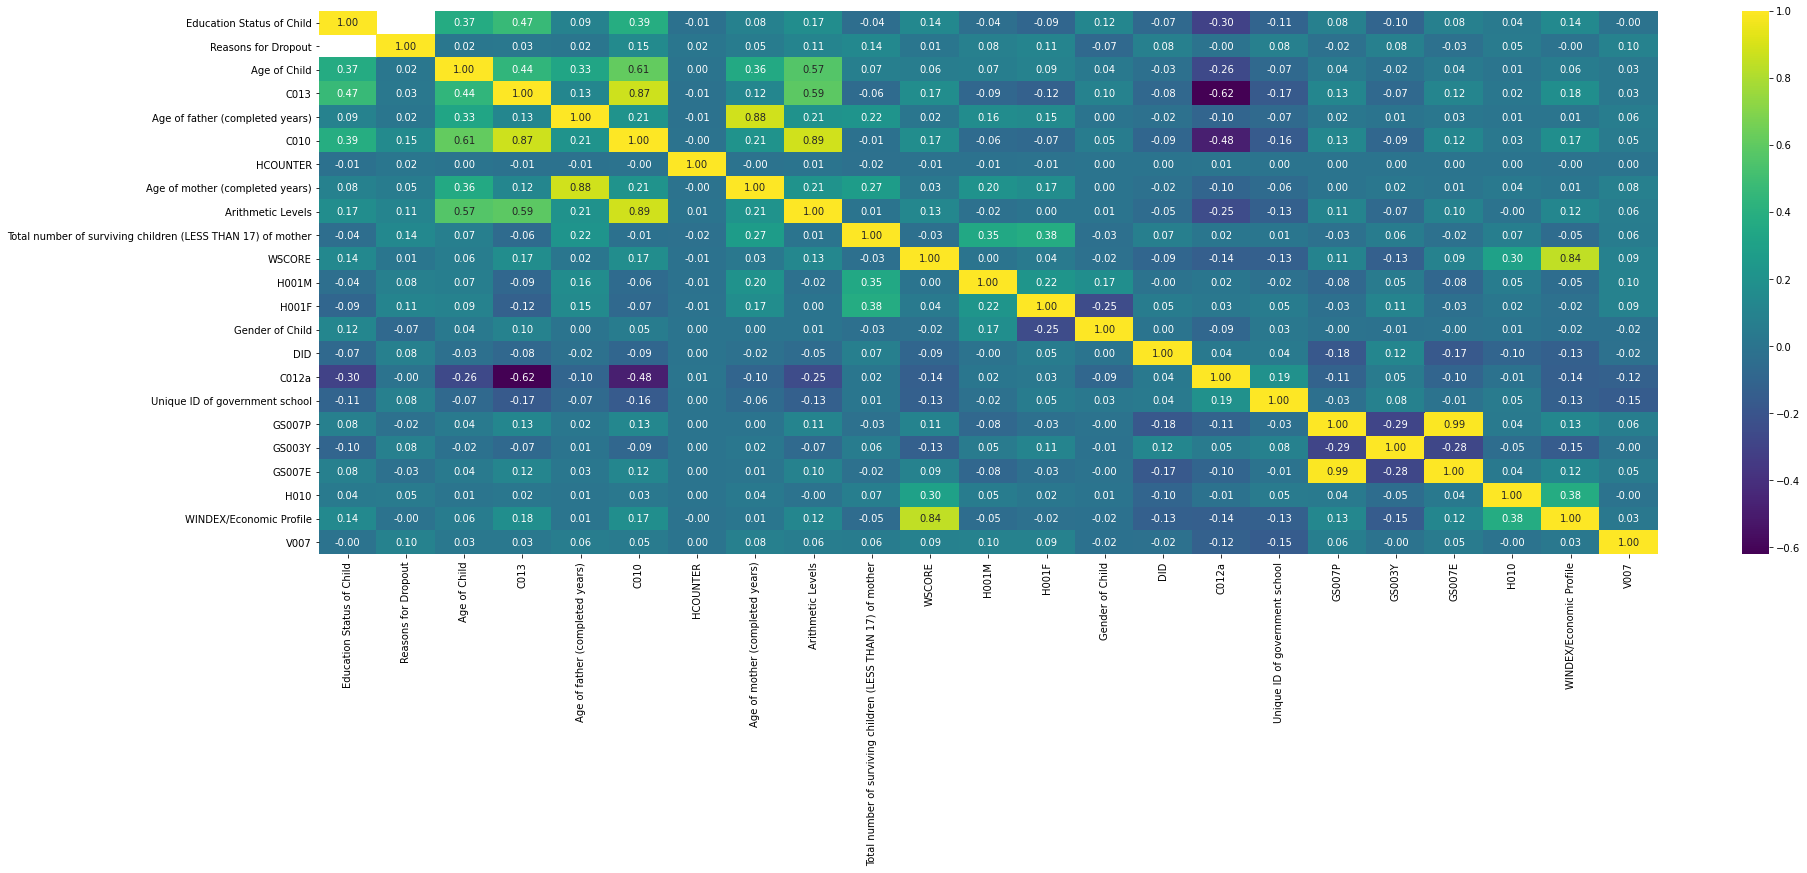

In [66]:
#Heatmap
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corrmat,annot=True, fmt='.2f', cmap=plt.cm.viridis, ax=ax)

In [ ]:
sns.pairplot(filtered)